# Project: Investigate a Dataset - No-show appointments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset includes data about more than 100 thousand medical appointments in Brazil, for each medical appointment, the following information is provided:<br>
**1 - PatientId:** Identification number of the patient<br>**2 - AppointmentID:** Identification number of the appointment<br>**3 - Gender:** Male or Female<br>**4 - ScheduledDay:** The day on which the appointment was booked<br>**5 - AppointmentDay:** The day on which the appointment itself took place<br>**6 - Age**<br>**7 - Neighbourhood:** Location of the appointment<br>**8 - Scholarship:** Whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>**9 - Hipertension:** Whether or not the patient suffers from Hypertension<br>**10 - Diabetes:** Whether or not the patient suffers from Diabetes<br>**11 - Alcoholism:** Whether or not the patient suffers from Alcoholism<br>**12 - Handcap:** Whether or not the patient is Handicapped<br>**13 - SMS_received:** Was the patient sent an SMS or not<br>**14 - No-show:** Whether or not the patient showed up for the appointment

### Question(s) for Analysis

**Q1)** What Characteristics lead to patients showing up?<br>
**Q2)** What is the Average age and Gender of patients that suffer from Diabetes, Hypertension, Alcoholism, and Handicap?<br>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

* This Dataset initially has 110527 rows & 14 columns
* 8 columns are ints, 5 columns are strings, and one column is float

In [87]:
#loading the dataset csv file
def load_data(filename):
    return pd.read_csv(filename)
df=load_data('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [89]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [90]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

* The Data does not have any missing values initially
* Patient Id should be converted from float to int
* AppointmentDay should be converted from string to datetime
* Date format seems impractical for AppointmentDay, will be split into month & day of week, then dropped
* In my opinion, appointment ID column is not needed for any conclusion, will be dropped
* Also, Scheduling day has no effect on whether or not a patient shows up, will be dropped
* Handcap column is misspelled, will be renamed to Handicap
* Hancap column should only takes values of 0, 1. Rows with values of 2 or 3 will be dropped
* No-show should be renamed for easy access into No_show
* There is 1 row with age value equal to -1 , will be dropped
* Ages of 0 will not be dropped, assumed to be younger than a year old

In [91]:
df.drop(['AppointmentID'],axis=1,inplace=True)
df.drop(['ScheduledDay'],axis=1,inplace=True)

**AppointmentID & ScheduledDay columns were dropped due to irrelevance**

In [92]:
df['PatientId']=df['PatientId'].astype(int)

**Patient ID column was converted to int to avoid scientific notation**

In [93]:
df.rename(columns={'Handcap':'Handicap'},inplace=True)

**Handcap column was renamed to Handicap**

In [94]:
invalid_handicap=df[df['Handicap']>1].index
df.drop(invalid_handicap,inplace=True)

**Rows with invalid Values of Handicap (2 , 3) were dropped**

In [95]:
df.drop(df.query('Age==-1').index,inplace=True)

**One row with age = -1 was dropped**

In [96]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

df['AppDay']=df['AppointmentDay'].dt.day_name()
df['AppMonth']=df['AppointmentDay'].dt.month

df.drop(['AppointmentDay'],axis=1,inplace=True)

**Appointment Day Column was converted to datetime type and split into two columns representing day & month, then dropped**

In [97]:
df.rename(columns={'No-show':'No_show'},inplace=True)

**No-show renamed to No_show**

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 13 columns):
PatientId        110327 non-null int64
Gender           110327 non-null object
Age              110327 non-null int64
Neighbourhood    110327 non-null object
Scholarship      110327 non-null int64
Hipertension     110327 non-null int64
Diabetes         110327 non-null int64
Alcoholism       110327 non-null int64
Handicap         110327 non-null int64
SMS_received     110327 non-null int64
No_show          110327 non-null object
AppDay           110327 non-null object
AppMonth         110327 non-null int64
dtypes: int64(9), object(4)
memory usage: 11.8+ MB


In [99]:
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,AppDay,AppMonth
0,29872499824296,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,4
1,558997776694438,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,4
2,4262962299951,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,4
3,867951213174,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,4
4,8841186448183,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,4


**After Cleaning the data, The Dataset has:**<br> 
* 110327 rows & 13 columns

In [100]:
#masks to facilitate filtering by no show
came=df['No_show']=='No'
missed=df['No_show']=='Yes'

<a id='eda'></a>
## Exploratory Data Analysis

### Q1) What Characteristics lead to patients showing up?

**1-Gender:**<br>
* Since Number of Females is much larger than that of males, comparing the number of people who came for every gender is unfair. That's why using proportion yields a more accurate result<br>
* Proportion is calculated by dividing count of every gender who came by total number of patients for that gender

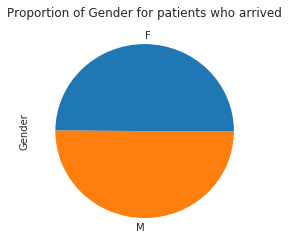

In [101]:
#counting total number of males and females in the data set
all_gender=df.groupby('Gender')['Age'].count()
#counting the number of males and females who came
came_gender=df[came].groupby('Gender')['Age'].count()
#dividing the two counts to get a proportion
came_gender/=all_gender
#plotting the proportion (plt.pie() will be used later, this is for variety of options)
came_gender.plot(kind='pie',title="Proportion of Gender for patients who arrived",label="Gender",figsize=(4,4));

The above Pie chart shows that a larger proportion of males has arrived to their appointments, but it is a very slight difference

**2-Age:**<br>

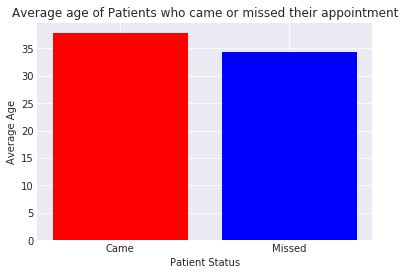

In [102]:
#calculating avg age of patients who came and missed
vals=df.groupby(['No_show'])['Age'].mean()
#plotting the results in a bar chart
plt.bar([1,2],vals,color=['r','b'],tick_label=['Came','Missed'])
#specifying x & y axis labels, as well as the chart title
plt.xlabel('Patient Status')
plt.ylabel('Average Age')
plt.title('Average age of Patients who came or missed their appointment');

**This shows that older people more often showed up to their appointments than younger people**

**3-Disease History:**<br>

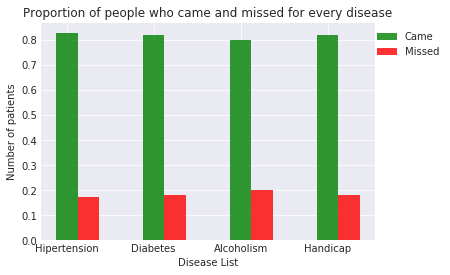

In [103]:
#creating a list of diseases in the dataset to facilitate later parts
disease_list=['Hipertension','Diabetes','Alcoholism','Handicap']
#calculating total number of patients having every disease
all_disease=df[disease_list].sum()
#calculating number of patients having every disease who came
came_disease=df[came][disease_list].sum()/all_disease
#calculating number of patients having every disease who missed
missed_disease=df[missed][disease_list].sum()/all_disease
#specifying locations of bars on x axis
ind=np.arange(0,came_disease.shape[0]*2,2)
#plotting 2 bar charts, one for patients who came, and one for who missed
plt.bar(ind,came_disease,width=0.5,color='g',alpha=0.8,tick_label=disease_list,label='Came')
plt.bar(ind+0.5,missed_disease,width=0.5,color='r',alpha=0.8,label='Missed')
plt.title('Proportion of people who came and missed for every disease')
plt.xlabel('Disease List')
plt.ylabel('Number of patients')
#locating the legend manually so it does not show over the bars
plt.legend(loc=10,bbox_to_anchor=(0.847,0.6,0.5,0.6));

**From The above figure, we can conclude that:**<br>
* The disease whose patients showed up the lest is Alcoholism<br>
* For Hypertension, Diabetes, and Handicap, their patient appear to be showing up in equal ratios

**4-Day of Appointment:**<br>

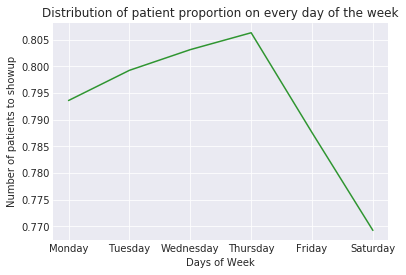

In [104]:
#calculating total no. of patients on every day
all_days=df.groupby('AppDay')['Age'].count()
#calculating no. of patients on every day who came
came_days=df[came].groupby(['AppDay'])['Age'].count()/all_days
#re-arranging the days to look more logical in the graph
came_days=came_days.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
#locations on x axis
ind=np.arange(0,len(came_days)*2,2)
#plotting a line chart of patients on different days
plt.plot(ind,came_days,color='g',alpha=0.8)
plt.xticks(ind,came_days.index)
plt.xlabel('Days of Week')
plt.ylabel('Number of patients to showup')
plt.title('Distribution of patient proportion on every day of the week');

**The above graph shows that:**<br>
* The largest proportion of patients to show up is on Thursday, indicating that Thursday is a convenient day of appointments<br>
* The smallest proportion of patients to show up is on Saturday, indicating that Saturday is not a convenient day for a lot of patients

**5-Month of Appointment:**<br>

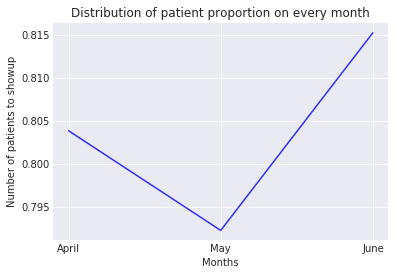

In [105]:
#calculating total no. of patients on every month
all_months=df.groupby('AppMonth')['Age'].count()
#calculating no. of patients on every month who came
came_months=df[came].groupby(['AppMonth'])['Age'].count()
#locations on x-axis
ind=np.arange(0,len(came_months)*2,2)
#plotting a line chart, (alpha specifies contrast of the line, set to 0.8 to avoid the color being too bright)
plt.plot(ind,came_months/all_months,color='b',alpha=0.8)
plt.xticks(ind,['April','May','June'])
plt.xlabel('Months')
plt.ylabel('Number of patients to showup')
plt.title('Distribution of patient proportion on every month');

**The above Graph Shows that:**
* The Largest Proportion of patients shows up in June
* The Smallest Proportion of patients shows up in May

**6-Enrollment in the Bolsa Família welfare program**

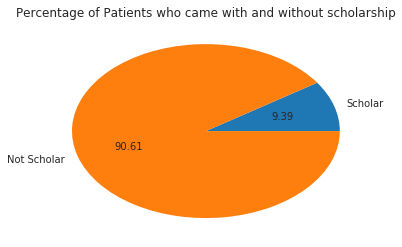

In [106]:
#calculating total no. of patients who came
all_came = df[came].count()[0]
#calculating total no. of patients who came and have scholarship 
came_sch = df[came].groupby('Scholarship')['Gender'].count()[1]/all_came
#plotting a pie chart to show percentages
#note: autopct shows the actual percentage on the pie chart
plt.pie([came_sch,1-came_sch],labels=['Scholar','Not Scholar'],autopct='%.2f');
plt.title('Percentage of Patients who came with and without scholarship');

**The above chart shows that:**
* Most of patients who came do not have the scholarship

**7- Receiving SMS**

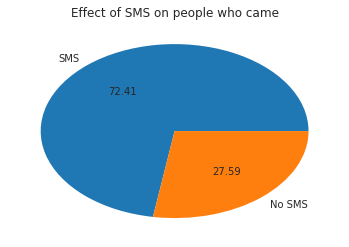

In [107]:
#calculating total no. of patients who received sms
all_sms=df.query('SMS_received==1').count()[0]
#calculating no. of patients who received sms and came
came_sms = df[came].groupby('SMS_received')['Age'].count()[1]/all_sms
#plotting pie chart
plt.pie([came_sms,1-came_sms],labels=['SMS','No SMS'],autopct='%.2f');
plt.title('Effect of SMS on people who came');

**The above chart shows that:**<br>
* SMS has a great effect in alerting patients to their appointment

**8- Appointment Neighbourhood**

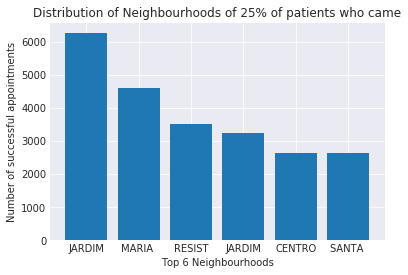

In [108]:
#calculating number of patients who came from the top 6 neighbourhoods
came_neigh=df[came]['Neighbourhood'].value_counts().sort_values(ascending=False)[:6]
#plotting a bar chart
plt.bar(np.arange(6),came_neigh,tick_label=came_neigh.index.str[:6])
plt.xlabel('Top 6 Neighbourhoods')
plt.ylabel('Number of successful appointments')
plt.title('Distribution of Neighbourhoods of 25% of patients who came');

**The above is a graph of the top 6 Neighbourhoods representing 25% of patients who came**<br>
* The absolute top neighbourhood is Jardim Camburi, clinics in this neighbourhood must be available in many convenient locations for patients

### Q2) What is the Average age and Gender of patients that suffer from Diabetes, Hypertension, Alcoholism, and Handicap?

In [109]:
#Creating a dataframe without duplicate patients
df_unique=df.drop_duplicates(subset=['PatientId'],keep='first')

**1- Average Age for every disease**

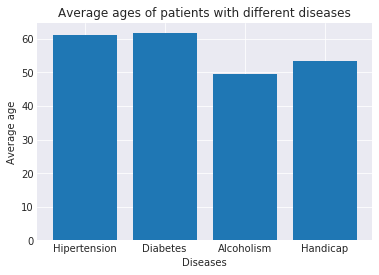

In [110]:
#creating a numpy array to hold mean age of patients with each disease
def disease_age_func(disease_list):
    res=np.empty(len(disease_list))
    i=0
    for d in disease_list:
        res[i]=df_unique.groupby([d])['Age'].mean()[1]
        i+=1
    return res
disease_mean_age=disease_age_func(disease_list)
#plotting bar chart
plt.bar([1,2,3,4],disease_mean_age,tick_label=disease_list)
plt.title('Average ages of patients with different diseases')
plt.xlabel('Diseases')
plt.ylabel('Average age');

**The above graph shows that:**<br>
* Hypertension & Diabetes often occur in patients in their 60s<br>
* Handicap & Alcoholism are more common in people in their 50s<br>

**2- Genders for every disease**

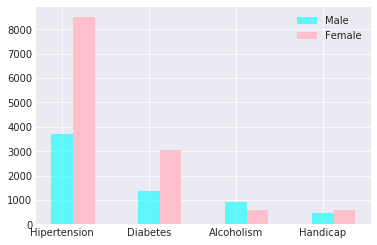

In [111]:
#counting no. of males and females having every disease
def disease_gender_func(disease_list):
    res1=np.empty(len(disease_list),dtype=int)
    res2=np.empty(len(disease_list),dtype=int)
    i=0
    for d in disease_list:
        res1[i] = df_unique.query('{}==1'.format(d)).groupby('Gender')['Age'].count()[0]
        res2[i] = df_unique.query('{}==1'.format(d)).groupby('Gender')['Age'].count()[1]
        i+=1
    return (res1,res2)

female_diseases,male_diseases=disease_gender_func(disease_list)

#plotting 2 bar charts, one for males & one for females
ind=np.arange(0,16*0.7,2.8)
plt.bar(ind,male_diseases,color='cyan',alpha=0.6,tick_label=disease_list,width=0.7,label='Male')
plt.bar(ind+0.7,female_diseases,color='pink',width=0.7,label='Female')
plt.legend();

**This Graph Shows that:**<br>
* Way more Females than males suffer from Hypertension & Diabetes
* More females suffer from Handicap but it is not a huge difference between them and males
* More Males suffer from Alcoholism

<a id='conclusions'></a>
## Conclusions
**The above research done can lead to the following conclusions:**<br>
* Patients of older Age often come to their appointments compared to younger patients
* The presence of diseases such as Hypertension, Diabetes, Alcoholism, and Handicap lead to patients showing up to their appointments more
* The number of patients increases in midweek, reaches peak on Thursday, then decreases on Friday and Thursday
* The least number of patients came in may, while the most came in june
* Only around 9% of patients who came to their appointments were subscribed to the Bolsa Família welfare program
* More than 70% of patients who came were notified by SMS
* The neighbourhoods with the most patients were: Jardim Camburi, Maria Ortiz, Resistência, Jardim da Penha, Centro, and Santa Martha
* Hypertension & Diabetes often occur in patients in their 60s
* Handicap & Alcoholism are more common in people in their 50s
* Way more Females than males suffer from Hypertension & Diabetes
* More females suffer from Handicap but it is not a huge difference between them and males
* More Males suffer from Alcoholism<br>

**Additional Reaserch can be carried out to:**
* Compare different characteristics together, rather than against showing up or not such as:
   * Neighbourhoods against days to determine peak days for evey neighbourhood
   * What age group or  gender benefits the most from the scholarship?

### Limitations
* 300 rows were dropped from the dataset, for invalid values of age and Handicap status
* In Q1, each row is being treated as a seperate individual, ignoring duplicate patient ID, to account for the fact that a single patient can show up to some of their appointments and miss some
* However in Q2, since it is concerned with patient characteristics, rather than their multiple appointments, duplicate patients have been removed, and every patient occurs once

In [112]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0